In [444]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go 
import plotly.express as px
from google.colab import drive

In [445]:
# Connect Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [446]:
# Read Datasets
df=pd.read_csv('gdrive/My Drive/DS4A/Project/Datasets/4. Base de datos de establecimientos AirBnb en Bogotá 2020-.csv', 
               parse_dates = [4, 5, 27], 
               dtype = {'Currency Native': str,
                        'Check-in Time': str,
                        'Checkout Time': str,
                        'Airbnb Listing URL': str,
                        'Airbnb Listing Main Image URL': str})
df['Airbnb Superhost'] = df['Airbnb Superhost'].astype(bool)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.



In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49953 entries, 0 to 49952
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Property ID                      49953 non-null  object        
 1   Listing Title                    49924 non-null  object        
 2   Property Type                    49917 non-null  object        
 3   Listing Type                     49926 non-null  object        
 4   Created Date                     48135 non-null  datetime64[ns]
 5   Last Scraped Date                49953 non-null  datetime64[ns]
 6   Country                          49953 non-null  object        
 7   Latitude                         49953 non-null  float64       
 8   Longitude                        49953 non-null  float64       
 9   State                            0 non-null      float64       
 10  City                             49953 non-null  object   

In [448]:
# Drop columns with very little information or no information at all
df.drop(['State', 
         'Zipcode', 
         'Metropolitan Statistical Area', 
         'HomeAway Premier Partner',
         'HomeAway Property ID', 
         'HomeAway Property Manager', 
         'HomeAway Listing URL', 
         'HomeAway Listing Main Image URL'], axis = 1, 
        inplace=True)

In [449]:
# Drop rows of the most important columns
df.dropna(subset=['Listing Title', 
                  'Property Type', 
                  'Listing Type',
                  'Created Date', 
                  'Neighborhood', 
                  'Currency Native',
                  'Number of Bookings LTM',
                  'Cancellation Policy',
                  'Minimum Stay',
                  'Bedrooms',
                  'Bathrooms',
                  'Max Guests',
                  'Cancellation Policy',
                  'Number of Reviews',
                  'Number of Photos',
                  'Airbnb Property ID',
                  'Airbnb Host ID',
                  'Airbnb Listing URL',
                  'Airbnb Listing Main Image URL'],
          inplace = True)

In [450]:
# Fix Neighborhood names
df['Neighborhood'] = df['Neighborhood'].str.strip()

In [451]:
pd.set_option('display.max_columns', None)
df.head()

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,Latitude,Longitude,City,Neighborhood,Currency Native,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Bedrooms,Bathrooms,Max Guests,Calendar Last Updated,Response Rate,Airbnb Superhost,Cancellation Policy,Security Deposit (USD),Security Deposit (Native),Cleaning Fee (USD),Cleaning Fee (Native),Extra People Fee (USD),Extra People Fee (Native),Published Nightly Rate (USD),Published Monthly Rate (USD),Published Weekly Rate (USD),Check-in Time,Checkout Time,Minimum Stay,Number of Reviews,Number of Photos,Instantbook Enabled,Overall Rating,Airbnb Property ID,Airbnb Host ID,Airbnb Listing URL,Airbnb Listing Main Image URL
0,ab-44018885,"Hermosa casa, El nogal",Residential home,Entire home/apt,2020-10-22,2022-02-14,Colombia,4.66309,-74.05459,Bogotá,Chapinero,COP,65.14,250000.0,912.0,3500000.0,0.070,8.0,14.0,186.0,14.0,4.0,3.0,5.0,NaT,0.0,False,flexible,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,1.0,0.0,11.0,False,NaN,44018885.0,351991717.0,https://www.airbnb.com/rooms/44018885,https://a0.muscache.com/im/pictures/496e7391-2...
1,ab-44019196,"CÓMODO, CENTRAL Y TRANQUILO.",Guesthouse,Entire home/apt,2020-10-09,2022-02-15,Colombia,4.63608,-74.07005,Bogotá,Teusaquillo,COP,14.00,55000.0,784.0,3080000.0,0.371,7.0,56.0,95.0,3.0,1.0,1.0,2.0,NaT,78.0,False,flexible,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,9:00 AM - 4:00 PM,4:00 PM,3.0,5.0,5.0,True,5.0,44019196.0,352772452.0,https://www.airbnb.com/rooms/44019196,https://a0.muscache.com/im/pictures/b3495a0b-6...
2,ab-44020565,Habitación Grande baño privado y terraza. 3piso,Guest suite,Private room,2020-10-25,2022-02-14,Colombia,4.75203,-74.05508,Bogotá,Suba,COP,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaT,0.0,False,flexible,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,Flexible,1:00 AM,1.0,0.0,8.0,False,NaN,44020565.0,30434345.0,https://www.airbnb.com/rooms/44020565,https://a0.muscache.com/im/pictures/25525e57-8...
3,ab-44030858,Hotel A&M florida 401,Apartment,Entire home/apt,2020-07-17,2021-01-30,Colombia,4.70717,-74.12482,Bogotá,Engativa,COP,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,3.0,1.0,4.0,NaT,60.0,False,flexible,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,After 10:00 AM,6:00 PM,1.0,2.0,17.0,False,4.5,44030858.0,338182528.0,https://www.airbnb.com/rooms/44030858,https://a0.muscache.com/im/pictures/6f60d777-5...
4,ab-44033318,Habitacion en bogota cerca a el aeropuerto 201,House,Private room,2020-10-20,2020-11-04,Colombia,4.67015,-74.10249,Bogotá,Engativa,COP,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,1.0,4.0,NaT,100.0,False,flexible,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,After 3:00 PM,NaN,1.0,0.0,17.0,True,NaN,44033318.0,264501662.0,https://www.airbnb.com/rooms/44033318,https://a0.muscache.com/im/pictures/9c8596b9-d...


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46624 entries, 0 to 48134
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Property ID                    46624 non-null  object        
 1   Listing Title                  46624 non-null  object        
 2   Property Type                  46624 non-null  object        
 3   Listing Type                   46624 non-null  object        
 4   Created Date                   46624 non-null  datetime64[ns]
 5   Last Scraped Date              46624 non-null  datetime64[ns]
 6   Country                        46624 non-null  object        
 7   Latitude                       46624 non-null  float64       
 8   Longitude                      46624 non-null  float64       
 9   City                           46624 non-null  object        
 10  Neighborhood                   46624 non-null  object        
 11  Currency Native

In [453]:
property_df = pd.DataFrame(df['Property Type'].value_counts()).reset_index().sort_values('Property Type', ascending = False).head(10).sort_values('Property Type')
ax = px.bar(property_df, x='Property Type', y='index', labels = {'Property Type':'# of Establishments', 
                                                              'index':'Property Type'}, title = 'Airbnb Establishments by Property Type')
ax.show()

In [454]:
property_df = pd.DataFrame(df['Neighborhood'].value_counts()).reset_index().sort_values('Neighborhood', ascending = False).head(10).sort_values('Neighborhood')
ax = px.bar(property_df, x='Neighborhood', y='index', labels = {'Neighborhood':'# of Establishments', 
                                                              'index':'Neighborhood'}, title = 'Airbnb Establishments by Neighborhood')
ax.show()

In [455]:
df[['Average Daily Rate (USD)', 'Average Daily Rate (Native)', 'Published Nightly Rate (USD)', 'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)']].describe()

,Average Daily Rate (USD),Average Daily Rate (Native),Published Nightly Rate (USD),Published Monthly Rate (USD),Published Weekly Rate (USD)
count,12496.000000,1.249200e+04,44933.000000,2.790200e+04,2.793100e+04
mean,36.039784,8.553411e+04,66.202791,2.949613e+03,7.672199e+02
std,46.266056,1.015402e+05,1453.689461,7.225140e+04,1.935749e+04
min,5.000000,9.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,17.277500,1.372275e+02,13.000000,4.130000e+02,1.050000e+02
50%,26.225000,6.954913e+04,23.000000,7.000000e+02,1.750000e+02
75%,41.960000,1.190094e+05,42.000000,1.236000e+03,3.150000e+02
max,3309.330000,2.500000e+06,236900.000000,6.633200e+06,1.658300e+06


In [456]:
df['Property Type'].unique()

array(['Residential home', 'Guesthouse', 'Guest suite', 'Apartment',
       'House', 'Serviced apartment', 'Room in hotel', 'Rental unit',
       'Condominium', 'Loft', 'Bed and breakfast', 'Tiny house',
       'Room in boutique hotel', 'Room in aparthotel', 'Cottage',
       'Condominium (condo)', 'Hostel', 'Farm stay', 'Dome house',
       'Cabin', 'Campsite', 'Townhouse', 'Casa particular', 'Villa',
       'Nature lodge', 'Barn', 'Room in serviced apartment', 'Castle',
       'Earth house', 'Camper/rv', 'Private room', 'Place', 'Shared room',
       'Tent', 'Tower', 'Vacation home', 'Chalet',
       'Casa particular (cuba)', 'Houseboat', 'Treehouse',
       'Room in hostel', 'Bus', 'Dorm', 'Pension (south korea)', 'Plane',
       'Room in bed and breakfast', 'Hotel',
       'Hotel room in serviced apartment', 'Boutique hotel', 'Pension',
       'Ryokan (japan)', 'Entire apartment', 'Private room in apartment',
       'Bed & Breakfast', 'Private room in bed and breakfast', 'Boat',
  

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46624 entries, 0 to 48134
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Property ID                    46624 non-null  object        
 1   Listing Title                  46624 non-null  object        
 2   Property Type                  46624 non-null  object        
 3   Listing Type                   46624 non-null  object        
 4   Created Date                   46624 non-null  datetime64[ns]
 5   Last Scraped Date              46624 non-null  datetime64[ns]
 6   Country                        46624 non-null  object        
 7   Latitude                       46624 non-null  float64       
 8   Longitude                      46624 non-null  float64       
 9   City                           46624 non-null  object        
 10  Neighborhood                   46624 non-null  object        
 11  Currency Native

In [458]:
df.describe()

,Latitude,Longitude,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Bedrooms,Bathrooms,Max Guests,Response Rate,Security Deposit (USD),Security Deposit (Native),Cleaning Fee (USD),Cleaning Fee (Native),Extra People Fee (USD),Extra People Fee (Native),Published Nightly Rate (USD),Published Monthly Rate (USD),Published Weekly Rate (USD),Minimum Stay,Number of Reviews,Number of Photos,Overall Rating,Airbnb Property ID,Airbnb Host ID
count,46624.000000,46624.000000,12496.000000,1.249200e+04,46624.000000,4.662400e+04,12496.000000,46624.000000,12496.000000,12496.000000,12496.000000,46624.000000,46624.000000,46624.000000,41024.000000,5218.000000,5.029000e+03,18717.000000,1.184600e+04,9527.000000,8855.000000,44933.000000,2.790200e+04,2.793100e+04,46624.000000,46624.000000,46624.000000,21183.000000,4.662400e+04,4.662400e+04
mean,4.669237,-74.070420,36.039784,8.553411e+04,427.192605,9.816745e+05,0.372645,3.685226,43.863796,65.184699,24.054097,1.450240,1.473769,2.839417,71.600990,223.156957,2.215291e+05,17.554095,1.409081e+04,12.794269,17201.497685,66.202791,2.949613e+03,7.672199e+02,5.561749,5.972525,14.339546,4.586569,8.860627e+14,1.366137e+08
std,0.042899,0.028844,46.266056,1.015402e+05,1627.241514,4.148037e+06,0.265182,10.985719,52.064495,56.213300,35.964147,1.603025,1.277604,2.168881,40.855422,325.335317,7.537618e+05,88.314257,2.768962e+04,12.830198,29784.699852,1453.689461,7.225140e+04,1.935749e+04,20.370970,20.143436,15.110886,0.740084,2.179328e+16,1.086034e+08
min,4.524440,-74.213190,5.000000,9.000000e+00,0.000000,0.000000e+00,0.032000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,52.000000,5.200000e+01,1.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,1.000000,6.627000e+03,7.061000e+03
25%,4.638133,-74.080025,17.277500,1.372275e+02,0.000000,0.000000e+00,0.136000,0.000000,8.000000,26.000000,0.000000,1.000000,1.000000,2.000000,44.000000,101.000000,1.040000e+02,8.000000,1.500000e+01,7.000000,10.000000,13.000000,4.130000e+02,1.050000e+02,1.000000,0.000000,6.000000,4.500000,1.754520e+07,4.118952e+07
50%,4.667020,-74.065075,26.225000,6.954913e+04,0.000000,0.000000e+00,0.325000,0.000000,24.000000,48.000000,5.000000,1.000000,1.000000,2.000000,100.000000,150.000000,2.500000e+02,13.000000,2.600000e+01,10.000000,40.000000,23.000000,7.000000e+02,1.750000e+02,1.000000,0.000000,10.000000,4.800000,2.793097e+07,1.156870e+08
75%,4.699039,-74.051840,41.960000,1.190094e+05,40.000000,3.162500e+02,0.567000,1.000000,60.000000,90.000000,35.000000,2.000000,2.000000,4.000000,100.000000,218.250000,3.000000e+05,20.000000,2.108250e+04,15.000000,30000.000000,42.000000,1.236000e+03,3.150000e+02,3.000000,3.000000,17.000000,5.000000,3.982083e+07,2.135242e+08
max,4.823085,-74.003550,3309.330000,2.500000e+06,71374.000000,2.735986e+08,1.000000,182.000000,343.000000,333.000000,252.000000,50.000000,50.000000,16.000000,100.000000,5253.000000,1.593174e+07,6850.000000,1.000001e+06,300.000000,850000.000000,236900.000000,6.633200e+06,1.658300e+06,569.000000,1470.000000,199.000000,5.000000,5.493036e+17,4.412079e+08


In [459]:
# Check values for every column
for col in df.columns:
  print(df[col].value_counts())

ab-44018885    1
ab-37399094    1
ab-37414617    1
ab-37415637    1
ab-37421063    1
              ..
ab-31389901    1
ab-31390095    1
ab-31390977    1
ab-31391312    1
ab-23918318    1
Name: Property ID, Length: 46624, dtype: int64
Habitación privada                                  73
Habitación                                          50
Bogotá Departamento                                 43
Apartamento                                         32
Habitación con baño privado                         31
                                                    ..
Lindo y acogedor apartamento en Chapinero            1
Sin pagar mas, con lo necesario para tu estadía.     1
lorena's home!                                       1
Apartamento kennedy                                  1
Grandiosa Habitación, cerca al AEROPUERTO            1
Name: Listing Title, Length: 43285, dtype: int64
Apartment               15729
Rental unit             13297
Residential home         2722
House                 

**Modelo Predictivo**

In [460]:
df.head()

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,Latitude,Longitude,City,Neighborhood,Currency Native,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Bedrooms,Bathrooms,Max Guests,Calendar Last Updated,Response Rate,Airbnb Superhost,Cancellation Policy,Security Deposit (USD),Security Deposit (Native),Cleaning Fee (USD),Cleaning Fee (Native),Extra People Fee (USD),Extra People Fee (Native),Published Nightly Rate (USD),Published Monthly Rate (USD),Published Weekly Rate (USD),Check-in Time,Checkout Time,Minimum Stay,Number of Reviews,Number of Photos,Instantbook Enabled,Overall Rating,Airbnb Property ID,Airbnb Host ID,Airbnb Listing URL,Airbnb Listing Main Image URL
0,ab-44018885,"Hermosa casa, El nogal",Residential home,Entire home/apt,2020-10-22,2022-02-14,Colombia,4.66309,-74.05459,Bogotá,Chapinero,COP,65.14,250000.0,912.0,3500000.0,0.070,8.0,14.0,186.0,14.0,4.0,3.0,5.0,NaT,0.0,False,flexible,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,1.0,0.0,11.0,False,NaN,44018885.0,351991717.0,https://www.airbnb.com/rooms/44018885,https://a0.muscache.com/im/pictures/496e7391-2...
1,ab-44019196,"CÓMODO, CENTRAL Y TRANQUILO.",Guesthouse,Entire home/apt,2020-10-09,2022-02-15,Colombia,4.63608,-74.07005,Bogotá,Teusaquillo,COP,14.00,55000.0,784.0,3080000.0,0.371,7.0,56.0,95.0,3.0,1.0,1.0,2.0,NaT,78.0,False,flexible,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,9:00 AM - 4:00 PM,4:00 PM,3.0,5.0,5.0,True,5.0,44019196.0,352772452.0,https://www.airbnb.com/rooms/44019196,https://a0.muscache.com/im/pictures/b3495a0b-6...
2,ab-44020565,Habitación Grande baño privado y terraza. 3piso,Guest suite,Private room,2020-10-25,2022-02-14,Colombia,4.75203,-74.05508,Bogotá,Suba,COP,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaT,0.0,False,flexible,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,Flexible,1:00 AM,1.0,0.0,8.0,False,NaN,44020565.0,30434345.0,https://www.airbnb.com/rooms/44020565,https://a0.muscache.com/im/pictures/25525e57-8...
3,ab-44030858,Hotel A&M florida 401,Apartment,Entire home/apt,2020-07-17,2021-01-30,Colombia,4.70717,-74.12482,Bogotá,Engativa,COP,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,3.0,1.0,4.0,NaT,60.0,False,flexible,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,After 10:00 AM,6:00 PM,1.0,2.0,17.0,False,4.5,44030858.0,338182528.0,https://www.airbnb.com/rooms/44030858,https://a0.muscache.com/im/pictures/6f60d777-5...
4,ab-44033318,Habitacion en bogota cerca a el aeropuerto 201,House,Private room,2020-10-20,2020-11-04,Colombia,4.67015,-74.10249,Bogotá,Engativa,COP,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,1.0,4.0,NaT,100.0,False,flexible,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,After 3:00 PM,NaN,1.0,0.0,17.0,True,NaN,44033318.0,264501662.0,https://www.airbnb.com/rooms/44033318,https://a0.muscache.com/im/pictures/9c8596b9-d...


In [461]:
# One Hot Encoding for Neighborhood
localidades = df['Neighborhood'].value_counts().index.to_list()
for localidad in localidades:
  df[localidad] = np.where(df['Neighborhood'] == localidad, 1, 0)

In [462]:
# One Hot Encoding for Cancellation Policy
df['Cancellation Policy'] = df['Cancellation Policy'].str.lower()

df['Flexible'] = np.where(df['Cancellation Policy'].str.contains('flexible'), 1, 0)
df['Moderate'] = np.where(df['Cancellation Policy'].str.contains('moderate'), 1, 0)
df['Strict'] = np.where((df['Cancellation Policy'].str.contains('strict') | df['Cancellation Policy'].str.contains('firm')), 1, 0)

In [463]:
# One Hot Encoding for Listing Type
listing_types = df['Listing Type'].value_counts().index.to_list()
for listing_type in listing_types:
  df[listing_type] = np.where(df['Listing Type'] == listing_type, 1, 0)

In [464]:
# Drop NA
df_model = df[[
              'Average Daily Rate (Native)', 'Occupancy Rate LTM', 'Number of Bookings LTM',
              'Bedrooms', 'Bathrooms', 'Max Guests', 'Airbnb Superhost', 'Minimum Stay', 'Overall Rating', 
              'Latitude', 'Longitude',
              #'Flexible', 'Moderate', 'Strict', 'Chapinero', 'Usaquen', 'Teusaquillo', 'Suba', 'Santa Fe', 'Engativa', 'Fontibon', 
              #'Barrios Unidos', 'Kennedy', 'Puente Aranda', 'Los Martires', 'San Cristobal', 'Antonio Narino', 'Bosa', 'Rafael Uribe', 'Tunjuelito',
              'Private room', 'Entire home/apt', 'Shared room', 'Hotel room'
              ]]

df_model = df_model.dropna()              
df_model

,Average Daily Rate (Native),Occupancy Rate LTM,Number of Bookings LTM,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Minimum Stay,Overall Rating,Latitude,Longitude,Private room,Entire home/apt,Shared room,Hotel room
1,55000.00,0.371,7.0,1.0,1.0,2.0,False,3.0,5.0,4.63608,-74.07005,0,1,0,0
5,46243.05,0.421,6.0,1.0,1.0,2.0,False,2.0,4.0,4.61969,-74.13385,0,1,0,0
13,62904.04,0.358,5.0,3.0,1.0,4.0,False,5.0,3.8,4.69514,-74.11396,0,1,0,0
14,80919.22,1.000,3.0,1.0,1.0,3.0,False,7.0,5.0,4.72600,-74.03800,0,1,0,0
18,96485.18,0.655,60.0,0.0,1.0,4.0,True,1.0,4.8,4.66543,-74.12331,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48110,44.00,0.502,61.0,1.0,1.0,3.0,True,1.0,5.0,4.59636,-74.07127,0,1,0,0
48113,104823.96,0.750,1.0,2.0,2.5,3.0,False,31.0,4.7,4.74000,-74.04200,0,1,0,0
48115,59615.38,0.080,1.0,1.0,1.0,2.0,False,3.0,5.0,4.72441,-74.03619,1,0,0,0
48116,57343.75,0.103,25.0,1.0,1.0,2.0,False,1.0,4.8,4.70348,-74.13026,1,0,0,0


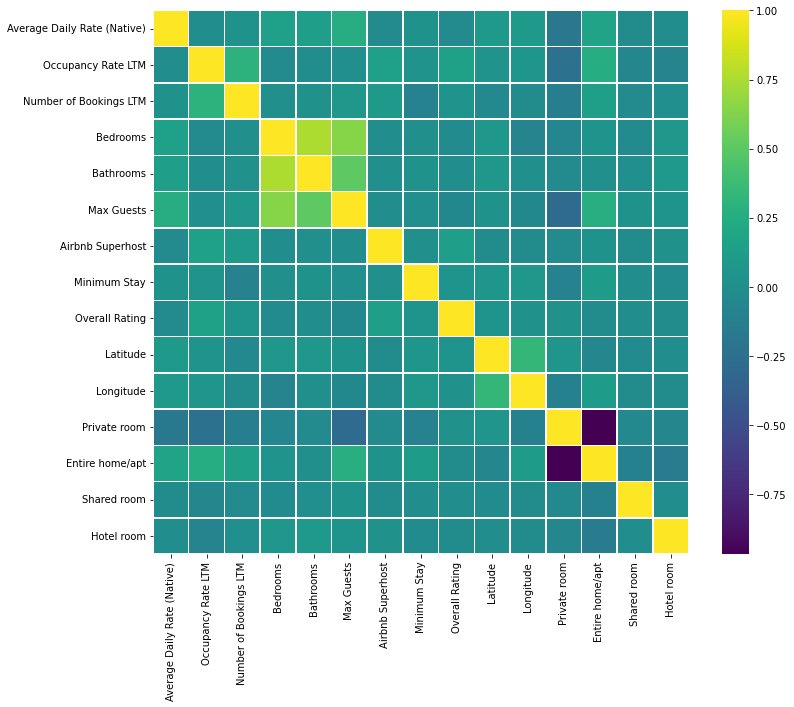

In [465]:
# Mapa de correlación de las variables
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(df_model.corr(), linewidths = .5, cmap= 'viridis');

In [466]:
# Dependent variable distribution
fig = px.histogram(df_model, 
                   x="Average Daily Rate (Native)",
                   title='Histogram of target (Average Daily Rate (Native)',)
fig.show()

In [467]:
# Fix prices below 1K
df_model['Target'] = df_model['Average Daily Rate (Native)'].apply(lambda x: x*1000  if x < 1000 else x)
fig = px.histogram(df_model, 
                   x="Target",
                   title='Histogram of target (Average Daily Rate (Native)',)
fig.show()
df_model = df_model.drop(columns=['Average Daily Rate (Native)'])

**Box-Cox Transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Lambda value used for Transformation: 0.048003632416880604


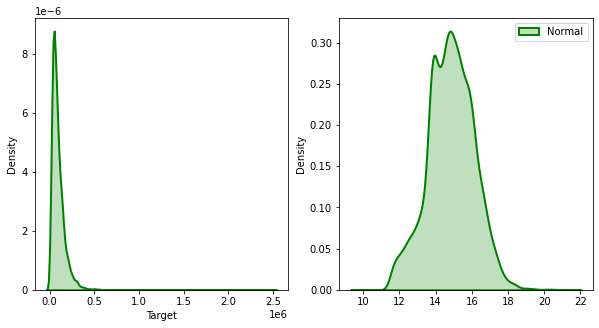

In [468]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df_model['Target']+1)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df_model['Target'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [469]:
fig = px.histogram(x=fitted_data,
                   title='Histogram of target (Average Daily Rate (Native)',)
fig.show()

In [470]:
# Train & Test Split
from sklearn.model_selection import train_test_split

#y = df_model['Target']
y = fitted_data
X = df_model.drop(columns = ['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [471]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.837653
Feature 1: 38.308715
Feature 2: 271.350967
Feature 3: 247.178625
Feature 4: 901.079909
Feature 5: 5.144509
Feature 6: 6.837210
Feature 7: 2.994083
Feature 8: 85.696423
Feature 9: 207.838440
Feature 10: 953.085246
Feature 11: 906.805685
Feature 12: 7.420171
Feature 13: 6.447478


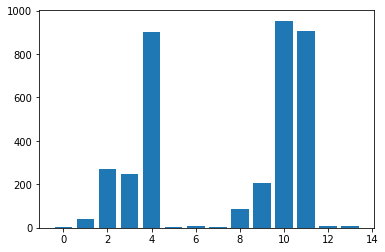

In [472]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [473]:
# Identify Variables
for i in range(len(X_train.columns)):
  print(f"{i}: {list(X_train.columns)[i]}")

0: Occupancy Rate LTM
1: Number of Bookings LTM
2: Bedrooms
3: Bathrooms
4: Max Guests
5: Airbnb Superhost
6: Minimum Stay
7: Overall Rating
8: Latitude
9: Longitude
10: Private room
11: Entire home/apt
12: Shared room
13: Hotel room


In [474]:
# Drop lowest variables
X_train = X_train.drop(['Occupancy Rate LTM', 'Number of Bookings LTM', 'Airbnb Superhost', 'Minimum Stay', 'Overall Rating'], axis = 1)
X_test = X_test.drop(['Occupancy Rate LTM', 'Number of Bookings LTM', 'Airbnb Superhost', 'Minimum Stay', 'Overall Rating'], axis = 1)

In [475]:
# Linear Regression
import statsmodels.api as sm
from scipy import stats
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c.astype(float))
results = model.fit()
lr_r2 = results.rsquared
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        02:41:30   Log-Likelihood:                -10243.
No. Observations:                6656   AIC:                         2.050e+04
Df Residuals:                    6647   BIC:                         2.057e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             387.7709     36.384     10.658      0.000     316.446     459.096
Bedrooms           -0.0341      0.020     -1.721      0.085      -0.073       0.005
Bathrooms           0.0709      0.019      3.636      0.000       0.033       0.109
Max Guests          0.1674      0.010     17.315      0.000       0.148       0.186
Latitude            2.4202      0.388      6.244      0.000       1.660       3.180
Longitude           6.5069      0.605     10.760      0.000       5.321       7.692
Private room       96.5356      9.098     10.611      0.000      78.701     114.370
Entire home/apt    97.3400      9.092     10.706      0.000      79.516     115.164
Shared room        96.4385      9.100     10.597      0.000      78.599     114.278
Hotel room         97.4568      9.097     10.713      0.000      79.624     115.289
==============================================================================
Omnibus:                       56.919   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.357
Skew:                          -0.201   Prob(JB):                     7.83e-14
Kurtosis:                       3.236   Cond. No.                     3.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [476]:
# Scalers
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

scalers = ['MinMaxScaler', 'MaxAbsScaler', 'RobustScaler', 'Normalizer', 'QuantileTransformer', 'PowerTransformer']
R2 = []

for scaler in scalers:
  s = getattr(preprocessing, scaler)

  X_train_scaler = s().fit_transform(X_train)
  X_test_scaler = s().fit_transform(X_test)

  X_train_c = sm.add_constant(X_train_scaler)
  reg = sm.OLS(y_train, X_train_c.astype(float))
  results = reg.fit()
  R2.append(results.rsquared.round(decimals = 6))

scalers.append('No Scaling')
R2.append(lr_r2)

data = {'Model': 'Linear Regression', 'Scaler': scalers, 'R2': R2}
summary = pd.DataFrame.from_dict(data)
summary

,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015


In [477]:
def lr_summary(sc, c = True, result = False):
  s = getattr(preprocessing, sc)

  X_train_scaler = s().fit_transform(X_train)
  X_test_scaler = s().fit_transform(X_test)

  if c == True:
    X_train_c = sm.add_constant(X_train_scaler)
  else:
    X_train_c = X_train_scaler

  reg = sm.OLS(y_train, X_train_c.astype(float))
  results = reg.fit()

  if result == True:
    print(results.summary())

  return X_train_scaler, X_test_scaler

In [478]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn import metrics

In [479]:
# Random Forest Regressor
R2 = []
for scaler in scalers:
  if scaler == 'No Scaling':
    X_train_sc = X_train
    X_test_sc = X_test
  else:
    X_train_sc, X_test_sc = lr_summary(scaler)

  RFG = RandomForestRegressor(max_depth = 6, random_state=1)
  RFG = RFG.fit(X_train_sc, y_train)
  y_pred_RFG = RFG.predict(X_test_sc)

  
  print("Random Forest Regressor: " + scaler)
  print('Mean Absolute Error: $', metrics.mean_absolute_error(y_test, y_pred_RFG).round(decimals = 2))
  print('R2:', metrics.r2_score(y_test, y_pred_RFG))
  print()

  R2.append(metrics.r2_score(y_test, y_pred_RFG))

data = {'Model': 'Random Forest Regressor', 'Scaler': scalers, 'R2': R2}
aux_df =  pd.DataFrame.from_dict(data)
summary = pd.concat([summary, aux_df])

Random Forest Regressor: MinMaxScaler
Mean Absolute Error: $ 0.84
R2: 0.26254173768677935

Random Forest Regressor: MaxAbsScaler
Mean Absolute Error: $ 0.84
R2: 0.2704936339754942

Random Forest Regressor: RobustScaler
Mean Absolute Error: $ 0.83
R2: 0.311462819148405

Random Forest Regressor: Normalizer
Mean Absolute Error: $ 0.84
R2: 0.30044906113080594

Random Forest Regressor: QuantileTransformer
Mean Absolute Error: $ 0.83
R2: 0.31035188461977725

Random Forest Regressor: PowerTransformer
Mean Absolute Error: $ 0.87
R2: 0.23682346983748626

Random Forest Regressor: No Scaling
Mean Absolute Error: $ 0.83
R2: 0.3142774239366146



,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015
0,Random Forest Regressor,MinMaxScaler,0.262542
1,Random Forest Regressor,MaxAbsScaler,0.270494
2,Random Forest Regressor,RobustScaler,0.311463


In [480]:
# XG Boost Regressor
R2 = []
for scaler in scalers:
  if scaler == 'No Scaling':
    X_train_sc = X_train
    X_test_sc = X_test
  else:
    X_train_sc, X_test_sc = lr_summary(scaler)

  GBR = GradientBoostingRegressor(random_state=1)
  GBR = GBR.fit(X_train_sc, y_train)
  y_pred_GBR = GBR.predict(X_test_sc)

  print("Gradient Boosting Regressor: " + scaler)
  print('Mean Absolute Error: $', metrics.mean_absolute_error(y_test, y_pred_GBR).round(decimals = 2))
  print('R2:', metrics.r2_score(y_test, y_pred_GBR))
  print()

  R2.append(metrics.r2_score(y_test, y_pred_GBR))

data = {'Model': 'Gradient Boosting Regressor', 'Scaler': scalers, 'R2': R2}
aux_df =  pd.DataFrame.from_dict(data)
summary = pd.concat([summary, aux_df])

Gradient Boosting Regressor: MinMaxScaler
Mean Absolute Error: $ 0.85
R2: 0.24764779406150428

Gradient Boosting Regressor: MaxAbsScaler
Mean Absolute Error: $ 0.85
R2: 0.22681437878693333

Gradient Boosting Regressor: RobustScaler
Mean Absolute Error: $ 0.84
R2: 0.30974102790794666

Gradient Boosting Regressor: Normalizer
Mean Absolute Error: $ 0.84
R2: 0.2980300707133481

Gradient Boosting Regressor: QuantileTransformer
Mean Absolute Error: $ 0.84
R2: 0.3089535005491736

Gradient Boosting Regressor: PowerTransformer
Mean Absolute Error: $ 0.86
R2: 0.25551452807858677

Gradient Boosting Regressor: No Scaling
Mean Absolute Error: $ 0.84
R2: 0.30798639802493455



,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015
0,Random Forest Regressor,MinMaxScaler,0.262542
1,Random Forest Regressor,MaxAbsScaler,0.270494
2,Random Forest Regressor,RobustScaler,0.311463


In [481]:
# Elastic Net
R2 = []
for scaler in scalers:
  if scaler == 'No Scaling':
    X_train_sc = X_train
    X_test_sc = X_test
  else:
    X_train_sc, X_test_sc = lr_summary(scaler)

  EN = ElasticNet(random_state=1)
  EN = EN.fit(X_train_sc, y_train)
  y_pred_EN = EN.predict(X_test_sc)

  print("Elastic Net: " + scaler)
  print('Mean Absolute Error: $', metrics.mean_absolute_error(y_test, y_pred_EN).round(decimals = 2))
  print('R2:', metrics.r2_score(y_test, y_pred_EN))
  print()

  R2.append(metrics.r2_score(y_test, y_pred_EN))

data = {'Model': 'Elastic Net', 'Scaler': scalers, 'R2': R2}
aux_df =  pd.DataFrame.from_dict(data)
summary = pd.concat([summary, aux_df])

Elastic Net: MinMaxScaler
Mean Absolute Error: $ 1.01
R2: -0.00023121526406666426

Elastic Net: MaxAbsScaler
Mean Absolute Error: $ 1.01
R2: -0.00023121526406666426

Elastic Net: RobustScaler
Mean Absolute Error: $ 1.01
R2: -0.00023121526406666426

Elastic Net: Normalizer
Mean Absolute Error: $ 1.01
R2: -0.00023121526406666426

Elastic Net: QuantileTransformer
Mean Absolute Error: $ 1.01
R2: -0.00023121526406666426

Elastic Net: PowerTransformer
Mean Absolute Error: $ 1.01
R2: -0.00023121526406666426

Elastic Net: No Scaling
Mean Absolute Error: $ 0.98
R2: 0.06566720984861085



,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015
0,Random Forest Regressor,MinMaxScaler,0.262542
1,Random Forest Regressor,MaxAbsScaler,0.270494
2,Random Forest Regressor,RobustScaler,0.311463


In [482]:
# Ridge
R2 = []
for scaler in scalers:
  if scaler == 'No Scaling':
    X_train_sc = X_train
    X_test_sc = X_test
  else:
    X_train_sc, X_test_sc = lr_summary(scaler)

  clf = Ridge(alpha=1.0, random_state = 1)
  clf = clf.fit(X_train_sc, y_train)
  y_pred_Ridge = clf.predict(X_test_sc)

  print("Ridge: " + scaler)
  print('Mean Absolute Error: $', metrics.mean_absolute_error(y_test, y_pred_Ridge).round(decimals = 2))
  print('R2:', metrics.r2_score(y_test, y_pred_Ridge))
  print()

  R2.append(metrics.r2_score(y_test, y_pred_Ridge))

data = {'Model': 'Ridge Regressor', 'Scaler': scalers, 'R2': R2}
aux_df =  pd.DataFrame.from_dict(data)
summary = pd.concat([summary, aux_df])

Ridge: MinMaxScaler
Mean Absolute Error: $ 0.89
R2: 0.22619948741379003

Ridge: MaxAbsScaler
Mean Absolute Error: $ 0.89
R2: 0.19975743751266317

Ridge: RobustScaler
Mean Absolute Error: $ 0.88
R2: 0.22752889238769003

Ridge: Normalizer
Mean Absolute Error: $ 0.93
R2: 0.14820983162256662

Ridge: QuantileTransformer
Mean Absolute Error: $ 0.86
R2: 0.2706083553074914

Ridge: PowerTransformer
Mean Absolute Error: $ 0.88
R2: 0.23166492909139513

Ridge: No Scaling
Mean Absolute Error: $ 0.88
R2: 0.22525942403908017



,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015
0,Random Forest Regressor,MinMaxScaler,0.262542
1,Random Forest Regressor,MaxAbsScaler,0.270494
2,Random Forest Regressor,RobustScaler,0.311463


In [483]:
# RidgeCV
R2 = []
for scaler in scalers:
  if scaler == 'No Scaling':
    X_train_sc = X_train
    X_test_sc = X_test
  else:
    X_train_sc, X_test_sc = lr_summary(scaler)

  RCV = RidgeCV()
  RCV = RCV.fit(X_train_sc, y_train)
  y_pred_RCV = RCV.predict(X_test_sc)

  print("RidgeCV: " + scaler)
  print('Mean Absolute Error: $', metrics.mean_absolute_error(y_test, y_pred_RCV).round(decimals = 2))
  print('R2:', metrics.r2_score(y_test, y_pred_RCV))
  print()

  R2.append(metrics.r2_score(y_test, y_pred_RCV))

data = {'Model': 'RidgeCV', 'Scaler': scalers, 'R2': R2}
aux_df =  pd.DataFrame.from_dict(data)
summary = pd.concat([summary, aux_df])

RidgeCV: MinMaxScaler
Mean Absolute Error: $ 0.89
R2: 0.22619948741381712

RidgeCV: MaxAbsScaler
Mean Absolute Error: $ 0.89
R2: 0.20485080618661522

RidgeCV: RobustScaler
Mean Absolute Error: $ 0.88
R2: 0.22776382319335942

RidgeCV: Normalizer
Mean Absolute Error: $ 0.9
R2: 0.19805472955206926

RidgeCV: QuantileTransformer
Mean Absolute Error: $ 0.86
R2: 0.2705493631304565

RidgeCV: PowerTransformer
Mean Absolute Error: $ 0.88
R2: 0.231657690463979

RidgeCV: No Scaling
Mean Absolute Error: $ 0.88
R2: 0.22712370982031516



,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015
0,Random Forest Regressor,MinMaxScaler,0.262542
1,Random Forest Regressor,MaxAbsScaler,0.270494
2,Random Forest Regressor,RobustScaler,0.311463


In [486]:
# Lasso CV
R2 = []
for scaler in scalers:
  if scaler == 'No Scaling':
    X_train_sc = X_train
    X_test_sc = X_test
  else:
    X_train_sc, X_test_sc = lr_summary(scaler)

  LCV = LassoCV(random_state = 1)
  LCV = LCV.fit(X_train_sc, y_train)
  y_pred_LCV = LCV.predict(X_test_sc)

  print("LassoCV: " + scaler)
  print('Mean Absolute Error: $', metrics.mean_absolute_error(y_test, y_pred_LCV).round(decimals = 2))
  print('R2:', metrics.r2_score(y_test, y_pred_LCV))
  print()

  R2.append(metrics.r2_score(y_test, y_pred_LCV))

data = {'Model': 'LassoCV', 'Scaler': scalers, 'R2': R2}
aux_df =  pd.DataFrame.from_dict(data)
summary = pd.concat([summary, aux_df])

LassoCV: MinMaxScaler
Mean Absolute Error: $ 0.89
R2: 0.22641683006664426

LassoCV: MaxAbsScaler
Mean Absolute Error: $ 0.89
R2: 0.20623569176232504

LassoCV: RobustScaler
Mean Absolute Error: $ 0.88
R2: 0.22770163242647967

LassoCV: Normalizer
Mean Absolute Error: $ 0.88
R2: 0.2290896023207578

LassoCV: QuantileTransformer
Mean Absolute Error: $ 0.86
R2: 0.2706643635123249

LassoCV: PowerTransformer
Mean Absolute Error: $ 0.88
R2: 0.2317624679601199

LassoCV: No Scaling
Mean Absolute Error: $ 0.88
R2: 0.2253148636011576



,Model,Scaler,R2
0,Linear Regression,MinMaxScaler,0.224015
1,Linear Regression,MaxAbsScaler,0.224015
2,Linear Regression,RobustScaler,0.224015
3,Linear Regression,Normalizer,0.240405
4,Linear Regression,QuantileTransformer,0.245278
5,Linear Regression,PowerTransformer,0.226561
6,Linear Regression,No Scaling,0.224015
0,Random Forest Regressor,MinMaxScaler,0.262542
1,Random Forest Regressor,MaxAbsScaler,0.270494
2,Random Forest Regressor,RobustScaler,0.311463


In [492]:
summary.assign(key=summary.groupby('Scaler').cumcount()).pivot('Model','Scaler','R2')

Scaler,MaxAbsScaler,MinMaxScaler,No Scaling,Normalizer,PowerTransformer,QuantileTransformer,RobustScaler
Model,,,,,,,
Elastic Net,-0.000231,-0.000231,0.065667,-0.000231,-0.000231,-0.000231,-0.000231
Gradient Boosting Regressor,0.226814,0.247648,0.307986,0.298030,0.255515,0.308954,0.309741
LassoCV,0.206236,0.226417,0.225315,0.229090,0.231762,0.270664,0.227702
Linear Regression,0.224015,0.224015,0.224015,0.240405,0.226561,0.245278,0.224015
Random Forest Regressor,0.270494,0.262542,0.314277,0.300449,0.236823,0.310352,0.311463
Ridge Regressor,0.199757,0.226199,0.225259,0.148210,0.231665,0.270608,0.227529
RidgeCV,0.204851,0.226199,0.227124,0.198055,0.231658,0.270549,0.227764


In [494]:
# Save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(RFG, open(filename, 'wb'))